In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

C:\Users\mikol\anaconda3\envs\lectures\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

df = pd.read_excel(url)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [4]:
train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]

In [5]:
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]

## Enhancements

### Dropout

![dropout](media\dropout.png)

### L1/L2 Weights Regularization

![regularization.png](media\regularization.png)

In [6]:
drop_rate = .1
lr = .001
hidden_size = 16
epochs = 250
val_frac = .25
metric = keras.losses.MeanSquaredError()
regularizer = 'l1_l2'
initializer = 'he_normal'

In [7]:
normalizer = layers.Normalization(axis=1)
enhanced_dense = layers.Dense(hidden_size, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer)
dropout = layers.Dropout(drop_rate)
output_dense = layers.Dense(1, kernel_initializer=initializer, kernel_regularizer=regularizer)

In [10]:
np.array(train_X.iloc[:20, 0]), dropout(np.array(train_X.iloc[:, 0], dtype=np.float32), training=True)[:20]

(array([266.  , 362.6 , 389.9 , 362.6 , 145.  , 276.4 , 149.  , 251.81,
        212.57, 393.  , 313.  , 170.3 , 469.  , 323.7 , 173.54, 228.  ,
        318.  , 250.2 , 273.  , 165.  ]),
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([295.55557, 402.88892, 433.22223, 402.88892, 161.11111, 307.1111 ,
        165.55556, 279.7889 , 236.1889 , 436.6667 , 347.7778 , 189.22223,
        521.11115,   0.     , 192.82222,   0.     , 353.33334, 278.     ,
        303.33334, 183.33334], dtype=float32)>)

In [12]:
enhanced_model = keras.Sequential([
    normalizer,
    enhanced_dense,
    dropout,
    output_dense
])

In [13]:
enhanced_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=lr),
    loss=metric
)

In [14]:
history = enhanced_model.fit(train_X, train_y, epochs=epochs, verbose=0, validation_split=val_frac).history

In [15]:
enhanced_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 178
Trainable params: 161
Non-trainable params: 17
_________________________________________________________________


<AxesSubplot:>

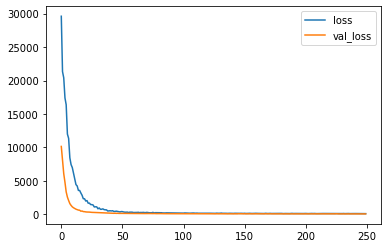

In [16]:
pd.DataFrame(history).plot()

In [17]:
enhanced_model.evaluate(test_X, test_y)

7/7 [==============================] - 0s 4ms/step - loss: 85.0564


85.05641174316406

## Multioutput

![multi](media\multi.svg)

In [18]:
base_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

red = pd.read_csv(f'{base_path}winequality-red.csv', sep=';')
white = pd.read_csv(f'{base_path}winequality-white.csv', sep=';')
red['color'] = 1
white['color'] = 0
df = pd.concat([red, white])
df['quality'] = df.quality.astype(np.float32)
df['color'] = df.color.astype(np.int64)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1


In [19]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [20]:
train_X, train_y = train_df.iloc[:, :-2], train_df.iloc[:, -2:]

In [21]:
test_X, test_y = test_df.iloc[:, :-2], test_df.iloc[:, -2:]

In [22]:
inputs = keras.Input(shape=(train_X.shape[1],))

In [23]:
normalizer = layers.Normalization(axis=-1)
x = normalizer(inputs)

In [24]:
dense = layers.Dense(hidden_size, activation='relu')
x = dense(x)

In [25]:
quality = layers.Dense(1, name='quality')(x)
color = layers.Dense(2, name='color')(x)

In [26]:
model = keras.Model(inputs=inputs, outputs=[quality, color])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 normalization_1 (Normalization  (None, 11)          23          ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 dense_2 (Dense)                (None, 16)           192         ['normalization_1[0][0]']        
                                                                                                  
 quality (Dense)                (None, 1)            17          ['dense_2[0][0]']            

In [27]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=lr),
    loss={
        'quality': keras.losses.MeanSquaredError(),
        'color': keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    },
    metrics={'color': tf.metrics.SparseCategoricalAccuracy()}
)

In [30]:
history = model.fit(train_X, {'quality': train_y.quality, 'color': train_y.color}, 
         epochs=100, verbose=2, validation_split=val_frac).history

Epoch 1/100
122/122 - 0s - loss: 0.6099 - quality_loss: 0.5416 - color_loss: 0.0683 - color_sparse_categorical_accuracy: 0.9797 - val_loss: 0.7114 - val_quality_loss: 0.6545 - val_color_loss: 0.0569 - val_color_sparse_categorical_accuracy: 0.9823 - 438ms/epoch - 4ms/step
Epoch 2/100
122/122 - 0s - loss: 0.6128 - quality_loss: 0.5458 - color_loss: 0.0669 - color_sparse_categorical_accuracy: 0.9805 - val_loss: 0.6232 - val_quality_loss: 0.5644 - val_color_loss: 0.0588 - val_color_sparse_categorical_accuracy: 0.9808 - 461ms/epoch - 4ms/step
Epoch 3/100
122/122 - 0s - loss: 0.6136 - quality_loss: 0.5471 - color_loss: 0.0665 - color_sparse_categorical_accuracy: 0.9802 - val_loss: 0.6043 - val_quality_loss: 0.5453 - val_color_loss: 0.0590 - val_color_sparse_categorical_accuracy: 0.9815 - 467ms/epoch - 4ms/step
Epoch 4/100
122/122 - 0s - loss: 0.6443 - quality_loss: 0.5773 - color_loss: 0.0670 - color_sparse_categorical_accuracy: 0.9818 - val_loss: 0.5990 - val_quality_loss: 0.5426 - val_colo

122/122 - 0s - loss: 0.6060 - quality_loss: 0.5417 - color_loss: 0.0642 - color_sparse_categorical_accuracy: 0.9810 - val_loss: 0.6197 - val_quality_loss: 0.5632 - val_color_loss: 0.0566 - val_color_sparse_categorical_accuracy: 0.9815 - 372ms/epoch - 3ms/step
Epoch 32/100
122/122 - 0s - loss: 0.6063 - quality_loss: 0.5411 - color_loss: 0.0652 - color_sparse_categorical_accuracy: 0.9818 - val_loss: 0.6159 - val_quality_loss: 0.5605 - val_color_loss: 0.0554 - val_color_sparse_categorical_accuracy: 0.9823 - 417ms/epoch - 3ms/step
Epoch 33/100
122/122 - 0s - loss: 0.6269 - quality_loss: 0.5602 - color_loss: 0.0667 - color_sparse_categorical_accuracy: 0.9805 - val_loss: 0.6251 - val_quality_loss: 0.5449 - val_color_loss: 0.0801 - val_color_sparse_categorical_accuracy: 0.9692 - 333ms/epoch - 3ms/step
Epoch 34/100
122/122 - 0s - loss: 0.6272 - quality_loss: 0.5603 - color_loss: 0.0669 - color_sparse_categorical_accuracy: 0.9800 - val_loss: 0.6474 - val_quality_loss: 0.5927 - val_color_loss: 0

Epoch 62/100
122/122 - 0s - loss: 0.6166 - quality_loss: 0.5527 - color_loss: 0.0638 - color_sparse_categorical_accuracy: 0.9818 - val_loss: 0.5919 - val_quality_loss: 0.5394 - val_color_loss: 0.0524 - val_color_sparse_categorical_accuracy: 0.9862 - 359ms/epoch - 3ms/step
Epoch 63/100
122/122 - 0s - loss: 0.6107 - quality_loss: 0.5458 - color_loss: 0.0649 - color_sparse_categorical_accuracy: 0.9792 - val_loss: 0.6395 - val_quality_loss: 0.5690 - val_color_loss: 0.0706 - val_color_sparse_categorical_accuracy: 0.9762 - 390ms/epoch - 3ms/step
Epoch 64/100
122/122 - 0s - loss: 0.6268 - quality_loss: 0.5640 - color_loss: 0.0628 - color_sparse_categorical_accuracy: 0.9805 - val_loss: 0.6033 - val_quality_loss: 0.5505 - val_color_loss: 0.0529 - val_color_sparse_categorical_accuracy: 0.9846 - 441ms/epoch - 4ms/step
Epoch 65/100
122/122 - 0s - loss: 0.6282 - quality_loss: 0.5647 - color_loss: 0.0635 - color_sparse_categorical_accuracy: 0.9838 - val_loss: 0.6178 - val_quality_loss: 0.5634 - val_

122/122 - 0s - loss: 0.6543 - quality_loss: 0.5898 - color_loss: 0.0645 - color_sparse_categorical_accuracy: 0.9815 - val_loss: 0.6012 - val_quality_loss: 0.5505 - val_color_loss: 0.0507 - val_color_sparse_categorical_accuracy: 0.9869 - 379ms/epoch - 3ms/step
Epoch 93/100
122/122 - 0s - loss: 0.6211 - quality_loss: 0.5596 - color_loss: 0.0616 - color_sparse_categorical_accuracy: 0.9828 - val_loss: 0.6096 - val_quality_loss: 0.5544 - val_color_loss: 0.0552 - val_color_sparse_categorical_accuracy: 0.9823 - 357ms/epoch - 3ms/step
Epoch 94/100
122/122 - 0s - loss: 0.6017 - quality_loss: 0.5377 - color_loss: 0.0640 - color_sparse_categorical_accuracy: 0.9828 - val_loss: 0.5885 - val_quality_loss: 0.5379 - val_color_loss: 0.0506 - val_color_sparse_categorical_accuracy: 0.9869 - 364ms/epoch - 3ms/step
Epoch 95/100
122/122 - 0s - loss: 0.6065 - quality_loss: 0.5411 - color_loss: 0.0655 - color_sparse_categorical_accuracy: 0.9805 - val_loss: 0.6237 - val_quality_loss: 0.5728 - val_color_loss: 0

<AxesSubplot:>

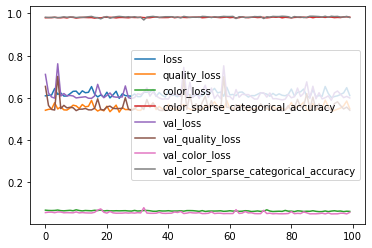

In [31]:
pd.DataFrame(history).plot()

<AxesSubplot:>

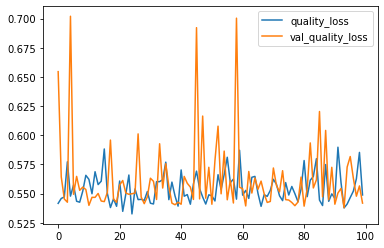

In [32]:
pd.DataFrame(history)[['quality_loss', 'val_quality_loss']].plot()

<AxesSubplot:>

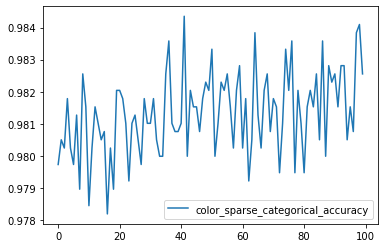

In [36]:
pd.DataFrame(history)[['color_sparse_categorical_accuracy']].plot()

In [35]:
model.evaluate(test_X, {'quality': test_y.quality, "color": test_y.color})

25/25 [==============================] - 0s 2ms/step - loss: 0.5444 - quality_loss: 0.5149 - color_loss: 0.0294 - color_sparse_categorical_accuracy: 0.9887


[0.5443671941757202,
 0.5149285793304443,
 0.029438549652695656,
 0.9886792302131653]

## NLP/RNN

In [37]:
(train_dataset, test_dataset), info = tfds.load('ag_news_subset', with_info=True,
                          as_supervised=True, split=['train[:50%]', 'test[:50%]'])

In [42]:
for desc, label in train_dataset.take(1):
    print(desc.numpy())
    print(label.numpy())

[b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
 b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
 b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
 b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'
 b'London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.'
 b'TOKYO - Sony Corp. is banking on the \\$3 billion deal to acquire Hollywo

In [41]:
BATCH_SIZE = 64
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [43]:
VOCAB_SIZE = 1000
encoder = keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda x, y: x))

In [44]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for',
       'that', '39s', 'with', 'as', 'its', 'at', 'is', 'said', 'by', 'it'],
      dtype='<U14')

In [45]:
labels = np.unique(np.concatenate([label for text, label in train_dataset], axis=0))
labels

array([0, 1, 2, 3], dtype=int64)

![embedding](media\embedding.png)
![rnn](media\rnn.png)
![lstm](media\lstm.webp)

In [52]:
model = keras.Sequential([
    encoder,
    layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    layers.LSTM(16),
    #layers.Dense(32, activation='relu'),
    layers.Dense(len(labels))
])

In [53]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [54]:
history = model.fit(train_dataset, epochs=5, verbose=1, validation_data=test_dataset,
         validation_steps=30).history

Epoch 1/5
938/938 [==============================] - 42s 37ms/step - loss: 1.1077 - accuracy: 0.5867 - val_loss: 0.7260 - val_accuracy: 0.7708
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.6339 - accuracy: 0.7971 - val_loss: 0.5374 - val_accuracy: 0.8323
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.5298 - accuracy: 0.8256 - val_loss: 0.4895 - val_accuracy: 0.8401
Epoch 4/5
938/938 [==============================] - 33s 36ms/step - loss: 0.4849 - accuracy: 0.8395 - val_loss: 0.4647 - val_accuracy: 0.8474
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.4600 - accuracy: 0.8449 - val_loss: 0.4511 - val_accuracy: 0.8479


<AxesSubplot:>

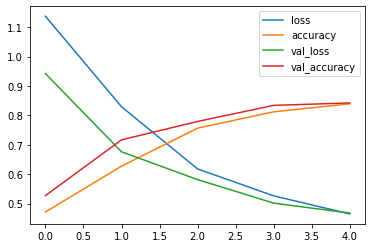

In [39]:
pd.DataFrame(history).plot()

In [50]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def custom_standarization(input_data):
    lowercase = tf.strings.lower(input_data)
    filtered = tf.strings.regex_replace(lowercase, r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*',"")
    return tf.strings.regex_replace(filtered, r'[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\]\^\_\`\{\|\}\~]',"")


encoder = keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                        standardize=custom_standarization)
encoder.adapt(train_dataset.map(lambda x, y: x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
model = keras.Sequential([
    encoder,
    layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(len(labels))
])

In [59]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [60]:
history = model.fit(train_dataset, epochs=5, verbose=1, validation_data=test_dataset,
                    validation_steps=30).history

Epoch 1/5
938/938 [==============================] - 80s 70ms/step - loss: 0.9483 - accuracy: 0.6416 - val_loss: 0.5918 - val_accuracy: 0.8052
Epoch 2/5
179/938 [====>.........................] - ETA: 52s - loss: 0.6058 - accuracy: 0.7954

KeyboardInterrupt: 

<AxesSubplot:>

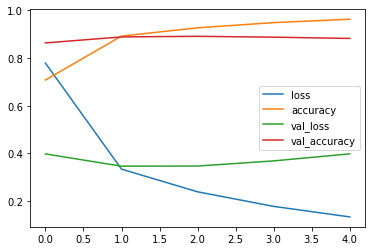

## TensorBoard

![tensorboard](media\tensorboard.png)

Reusing TensorBoard on port 6006 (pid 25060), started 3:43:57 ago. (Use '!kill 25060' to kill it.)